# Lab | Cleaning numerical data

For this lab, we will be using the dataset in the Customer Analysis Business Case. This dataset can be found in files_for_lab folder.

Context

An auto insurance company has collected some data about its customers including their demographics, education, employment, policy details, vehicle information on which insurance policy is, and claim amounts. You will help the senior management with some business questions that will help them to better understand their customers, improve their services, and improve profitability.

Some business Objectives:

Retain customers, Analyze relevant customer data, Develop focused customer retention programs. Based on the analysis, take targeted actions to increase profitable customer response, retention, and growth.

Data Analysis Process

Remember the process:

Case Study
Get data
Cleaning/Wrangling/EDA
Processing Data
Modeling -Validation
Reporting
Instructions

Import the necessary libraries.

Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df

First look at its main features (head, shape, info).

Rename the columns so they follow the PE8 (snake case) (lower_case_with_underscores)

Change effective to date column to datetime format.

Create a new dataframe using only the numerical data called numerical_df. Use this for the following questions.

Define a function that differentiates between continuous and discrete variables. Hint: The number of unique values might be useful. Store continuous data into a continuous_df variable and do the same for discrete_df

Plot a correlation matrix, comment what you see.

Create a function to plot every discrete variable. Do the same with the continuous variables (Be Careful, you may need to change the plot type to one better suited for continuous data!)

Comment what you can see in the plots.

Look for outliers in the continuous variables. (HINT: There’s a good plot to do that!)

Did you find outliers? Comment what you will do with them. If you decide to remove them, do that now.

Check all columns for NaN values. Decide what (if anything) you will need to do with them, do that now.

Save the numerical_df to csv as numerical.csv You will use this file again this week.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/Users/igorhufnagel/Desktop/Ironhack/LABS/Week 8/Day 2/lab-cleaning-numerical-data/files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [3]:
data.shape

(9134, 24)

In [4]:
data.dtypes

Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object

In [6]:
PE8_columns = []
for col in data.columns:
    PE8_columns.append(col.lower().replace(' ', '_'))
data.columns = PE8_columns

In [7]:
data.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [8]:
data['customer_lifetime_value'] = pd.to_datetime(data['customer_lifetime_value'], errors='coerce')

In [9]:
data.dtypes

customer                                 object
state                                    object
customer_lifetime_value          datetime64[ns]
response                                 object
coverage                                 object
education                                object
effective_to_date                        object
employmentstatus                         object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                   int64
months_since_policy_inception             int64
number_of_open_complaints                 int64
number_of_policies                        int64
policy_type                              object
policy                                   object
renew_offer_type                         object
sales_channel                           

In [10]:
numerical_df = data._get_numeric_data()
numerical_df

,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,56274,69,32,5,0,1,384.811147
1,0,94,13,42,0,8,1131.464935
2,48767,108,18,38,0,2,566.472247
3,0,106,18,65,0,7,529.881344
4,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...
9129,71941,73,18,89,0,2,198.234764
9130,21604,79,14,28,0,1,379.200000
9131,0,85,9,37,3,2,790.784983
9132,21941,96,34,3,0,3,691.200000


In [11]:
def differentiate_variables(df):
    
    continuous_cols = []
    discrete_cols = []

    for col in numerical_df.columns:
        if numerical_df[col].nunique() <= 20:
            discrete_cols.append(col)
        else:
            continuous_cols.append(col)

    continuous_df = df[continuous_cols]
    discrete_df = df[discrete_cols]

    return continuous_df, discrete_df
continuous_df, discrete_df = differentiate_variables(numerical_df)

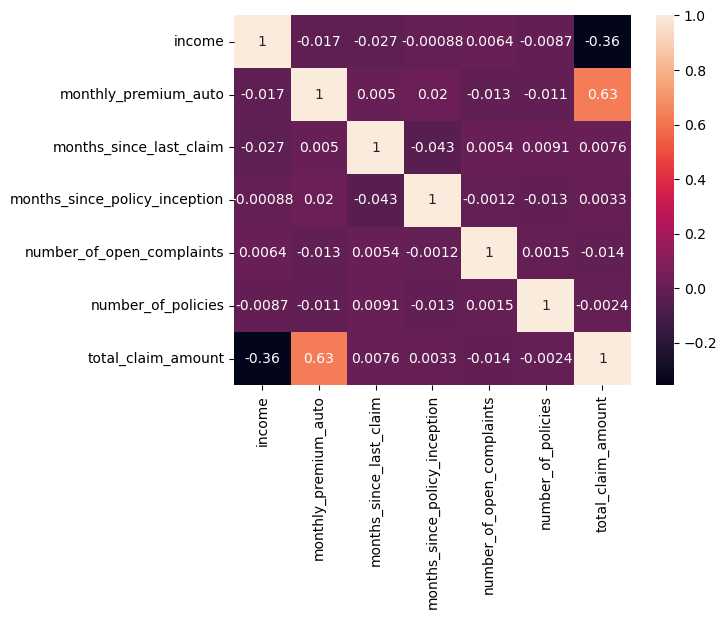

In [12]:
corr_matrix = numerical_df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [ ]:
# the columns 'total_claim_amount' and 'montly_premium_auto' are strong correlated.

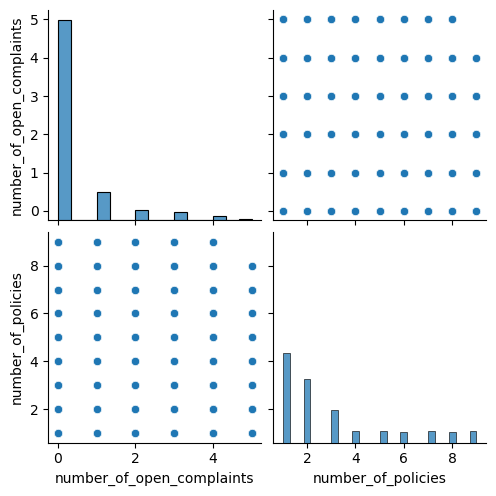

In [13]:
sns.pairplot(discrete_df)

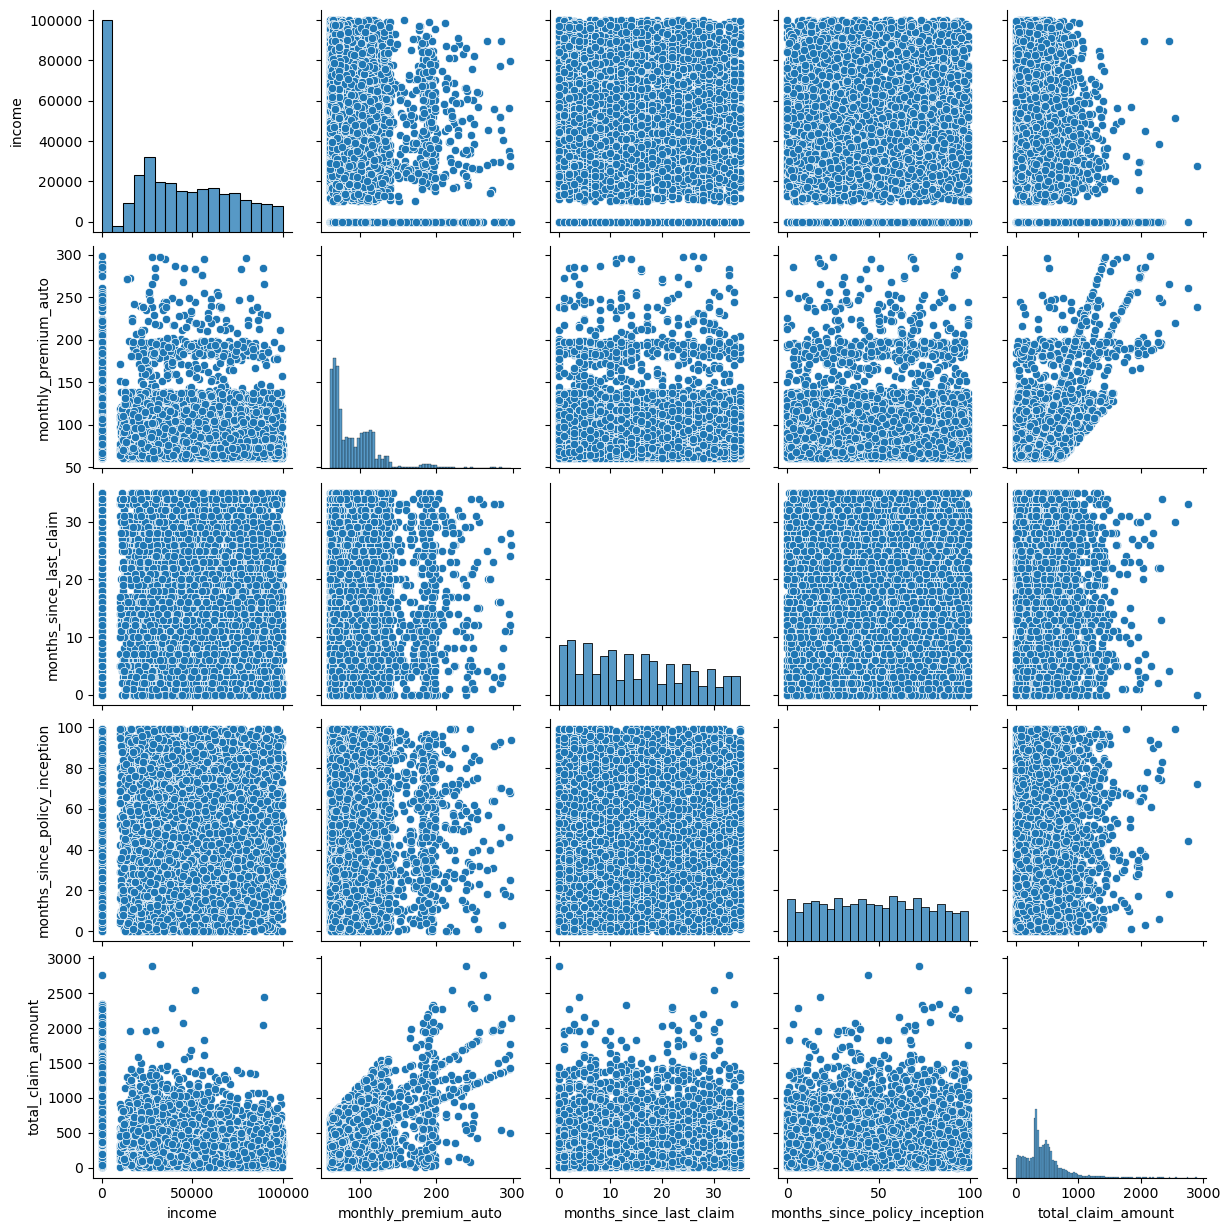

In [14]:
sns.pairplot(continuous_df)

In [ ]:
# The variables are not normally distributed and some of them present outliers.

/Users/igorhufnagel/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


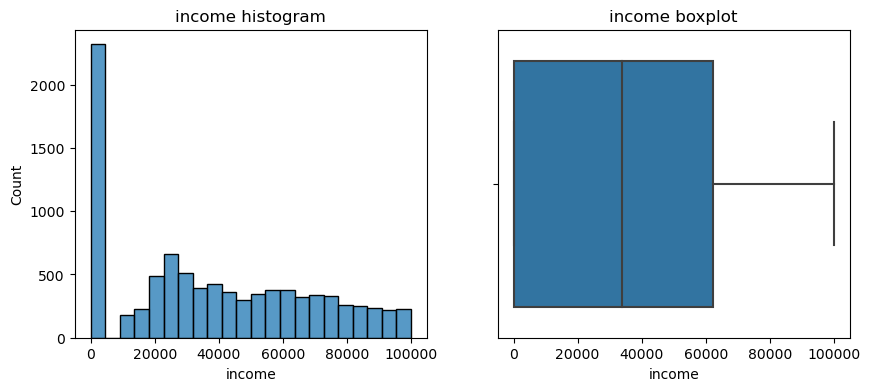

/Users/igorhufnagel/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


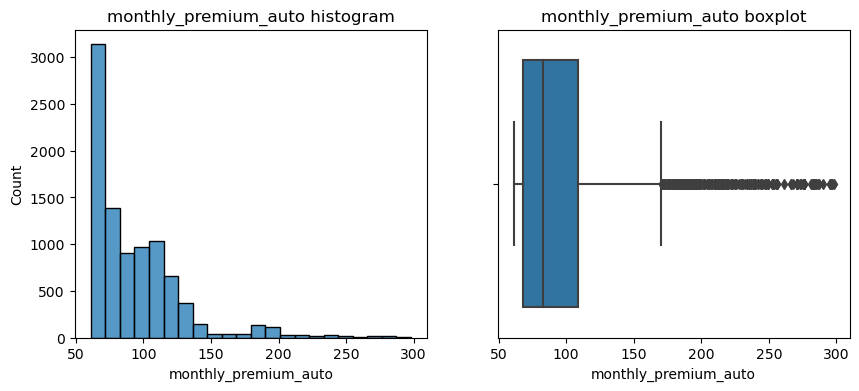

/Users/igorhufnagel/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


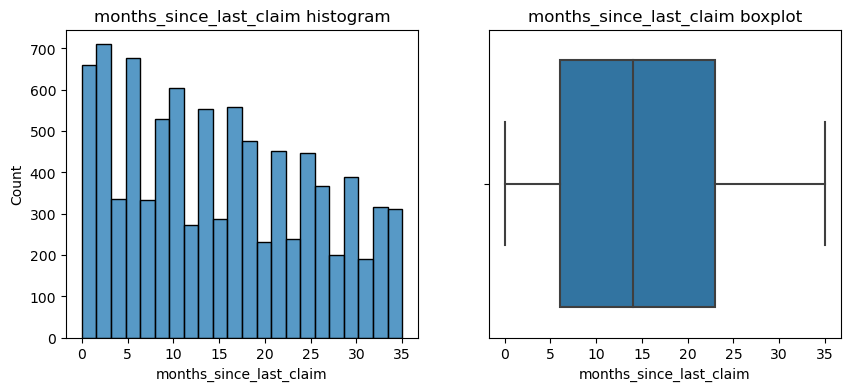

/Users/igorhufnagel/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


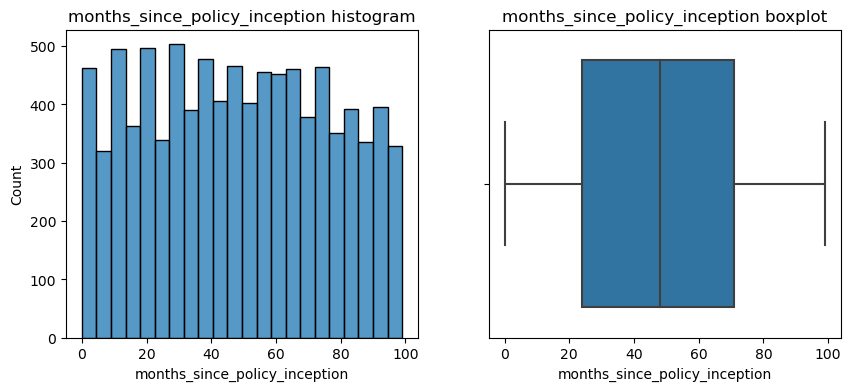

/Users/igorhufnagel/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


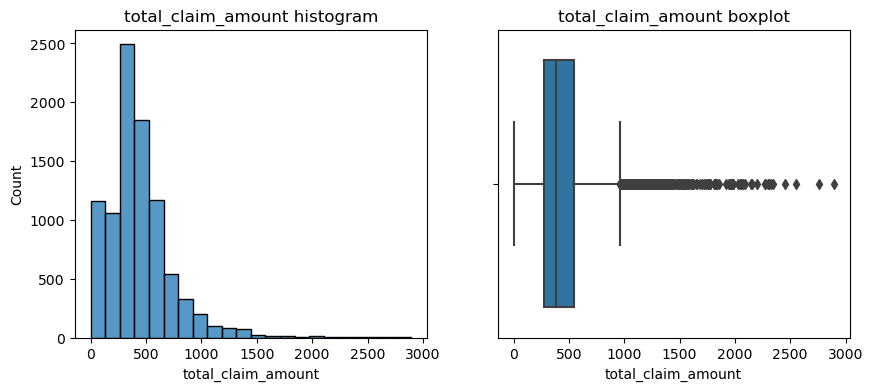

In [16]:
def plot_continuous_variables (df):
    for var in continuous_df:
            fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 4))
            sns.histplot(df[var], bins=22, ax=ax1)
            ax1.set_title(f"{var} histogram")
            sns.boxplot(df[var], ax=ax2)
            ax2.set_title(f"{var} boxplot")
            plt.show()
plot_continuous_variables(continuous_df)

In [17]:
# Outliers are present in the columns 'total_claim_amount' and 'monthly_premium_auto'. Removing them: 

q3 = continuous_df['total_claim_amount'].quantile(0.75)
q1 = continuous_df['total_claim_amount'].quantile(0.25)
IQR = q3 - q1
upper_limit = q3 + 1.5*IQR
lower_limit = q1 - 1.5*IQR

continuous_df = continuous_df[(continuous_df['total_claim_amount'] >= lower_limit) & 
                              (continuous_df['total_claim_amount'] <= upper_limit)]

In [20]:
q3 = continuous_df['monthly_premium_auto'].quantile(0.75)
q1 = continuous_df['monthly_premium_auto'].quantile(0.25)
IQR = q3 - q1
upper_limit = q3 + 1.5*IQR
lower_limit = q1 - 1.5*IQR

continuous_df = continuous_df[(continuous_df['monthly_premium_auto'] >= lower_limit) & 
                              (continuous_df['monthly_premium_auto'] <= upper_limit)]

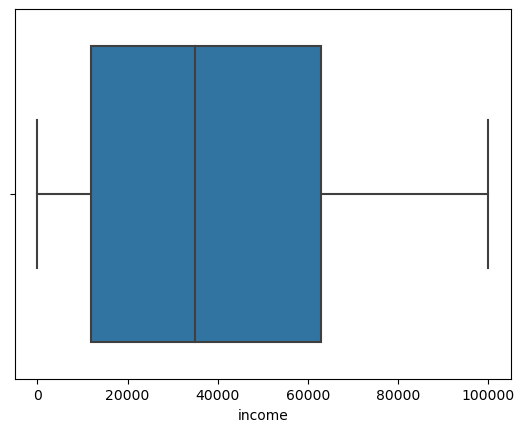

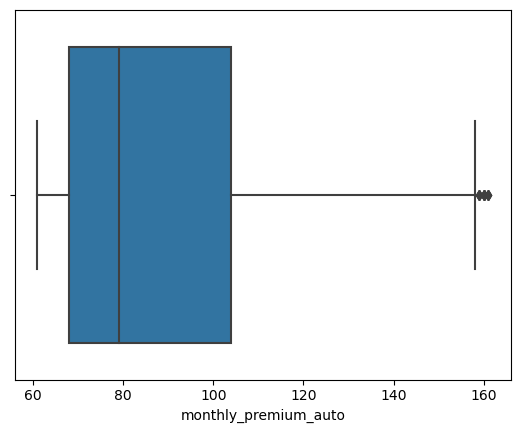

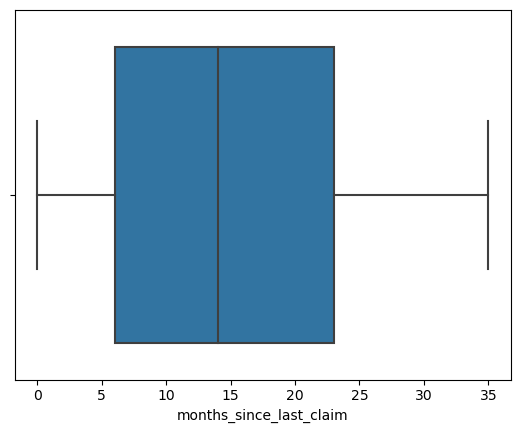

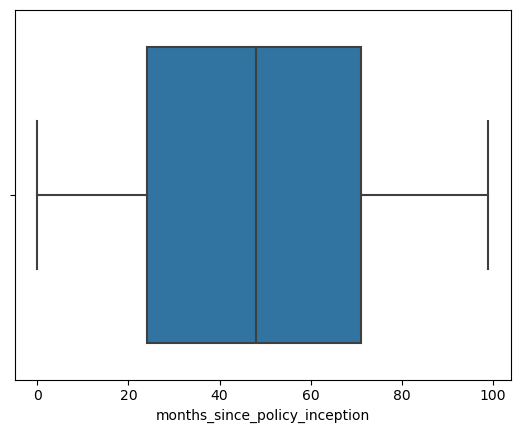

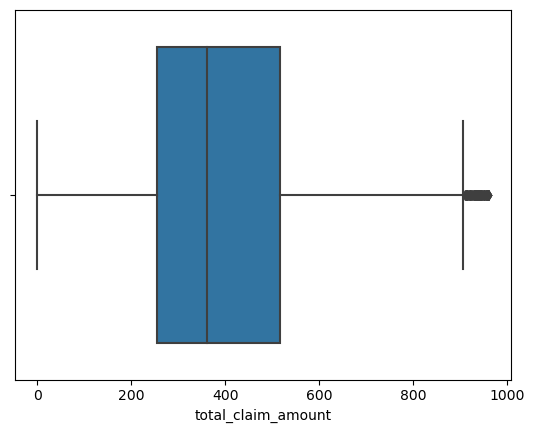

In [22]:
for col in continuous_df.columns:
    sns.boxplot(x = col, data = continuous_df)
plt.show()

In [23]:
numerical_df.isna().sum()*100/len(numerical_df)

income                           0.0
monthly_premium_auto             0.0
months_since_last_claim          0.0
months_since_policy_inception    0.0
number_of_open_complaints        0.0
number_of_policies               0.0
total_claim_amount               0.0
dtype: float64

In [24]:
numerical_df.to_csv('numerical.csv', index=False)